<a href="https://colab.research.google.com/github/Matt-D-Walters/UnemploymentRates/blob/main/UnemploymentRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
pip install fredapi

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


from fredapi import Fred
from google.colab import userdata

fred_key = userdata.get('Fred_API')
fred = Fred(api_key=fred_key)



In [69]:
sp_search = fred.search('Unemployment Rate', order_by='popularity')
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-12-17,2023-12-17,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,94,The unemployment rate represents the number of...
CPIAUCSL,CPIAUCSL,2023-12-17,2023-12-17,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-12-12 07:42:01-06:00,94,The Consumer Price Index for All Urban Consume...
PAYEMS,PAYEMS,2023-12-17,2023-12-17,"All Employees, Total Nonfarm",1939-01-01,2023-11-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-12-08 07:52:02-06:00,82,"All Employees: Total Nonfarm, commonly known a..."
SAHMREALTIME,SAHMREALTIME,2023-12-17,2023-12-17,Real-time Sahm Rule Recession Indicator,1959-12-01,2023-11-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2023-12-08 08:02:01-06:00,82,Sahm Recession Indicator signals the start of ...
ICSA,ICSA,2023-12-17,2023-12-17,Initial Claims,1967-01-07,2023-12-09,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-12-14 07:34:01-06:00,81,An initial claim is a claim filed by an unempl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUNTTTTBRA156N,LRUNTTTTBRA156N,2023-12-17,2023-12-17,Unemployment Rate: Aged 15 and over: All Perso...,1981-01-01,2014-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-14 15:03:09-05:00,3,OECD Descriptor ID: LRUNTTTT OECD unit ID: PC ...
LBSSA05,LBSSA05,2023-12-17,2023-12-17,Labor Force Participation Rate for Arkansas,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 09:01:17-06:00,3,A state's labor-force participation rate is th...
COMONT5URN,COMONT5URN,2023-12-17,2023-12-17,"Unemployment Rate in Montrose County, CO",1990-01-01,2023-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-11-30 10:12:13-06:00,3,These data come from the Current Population Su...


In [70]:
unemp_rate = fred.get_series('UNRATE')
unemp_rate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.9
2023-11-01    3.7
Length: 911, dtype: float64

In [71]:
# Convert the index and values of the 'unemp_rate' object into a new DataFrame with columns 'date' and 'value'.

unemployment_rate = pd.DataFrame({'date': unemp_rate.index, 'value': unemp_rate.values})


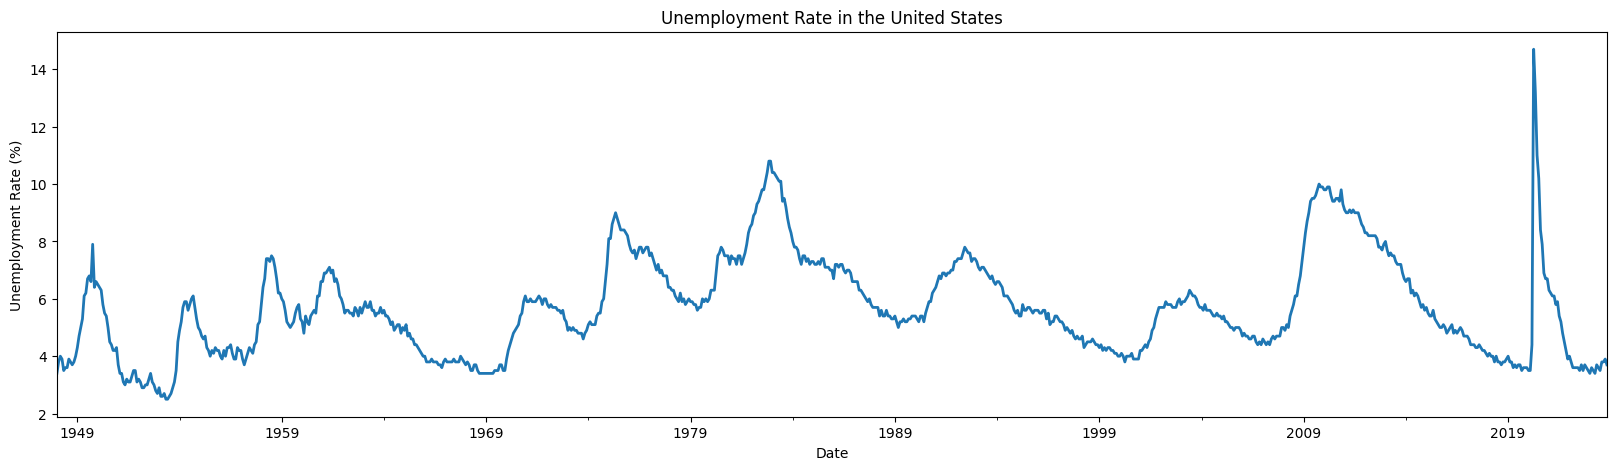

In [72]:
plot = unemployment_rate.plot(x='date', y='value', figsize=(20, 5), title='Unemployment Rate in the United States',legend=False, lw=2)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.show()

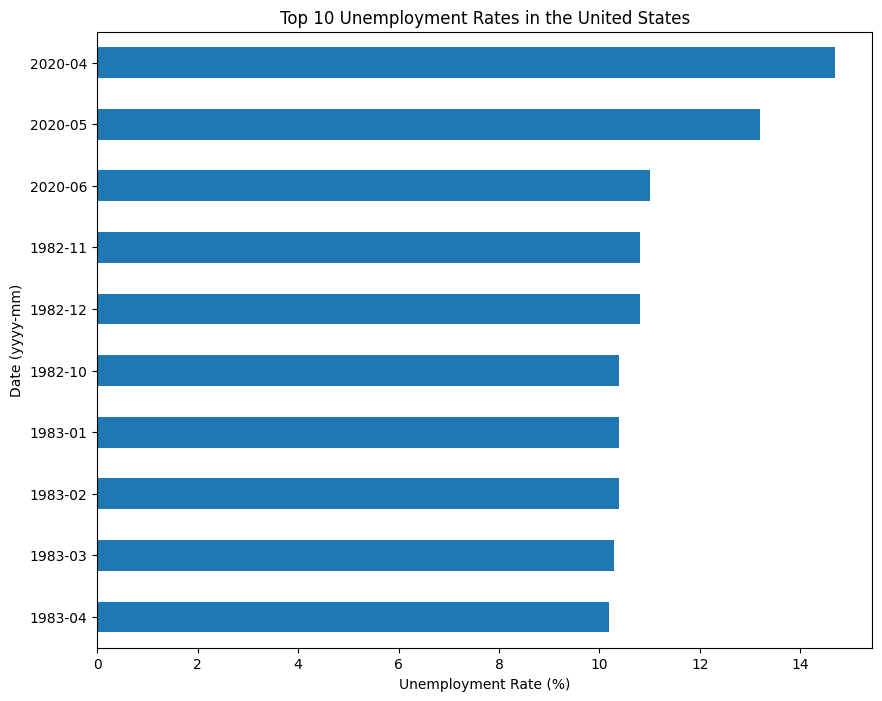

In [84]:
unemployment_rate['date'] = pd.to_datetime(unemployment_rate['date'])

# Format 'date' as 'yyyy-mm'
unemployment_rate['formatted_date'] = unemployment_rate['date'].dt.strftime('%Y-%m')

# Convert 'value' to numeric (in case it's not already)
unemployment_rate['value'] = pd.to_numeric(unemployment_rate['value'], errors='coerce')

# Sorting values by 'value' in descending order and selecting the top 10
top_10_unemployment = unemployment_rate.sort_values('value', ascending=False).head(10)
top_10_unemployment = top_10_unemployment[::-1]

# Plotting the horizontal bar plot with 'value' as the x-axis
top_10_unemployment.plot(kind='barh', y='value', x='formatted_date', figsize=(10, 8), legend=False)
plt.title('Top 10 Unemployment Rates in the United States')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Date (yyyy-mm)')

plt.show()